In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# show all cols
pd.set_option('display.max_columns', None)

In [3]:
DESCRIPTIONS = pd.read_json('../data/desc.json')

# Carga de datos...

In [ ]:
# Carga de archivos CSV

dfAuctions = pd.read_csv('../data/auctions.csv',
                         engine='c',
                         dtype={'platform':np.int8, 'ref_type_id':np.int8, 'source_id':np.int8});

dfEvents = pd.read_csv('../data/events.csv', engine='c',
                 dtype={'event_id':np.int8, 'ref_type':np.int8, 'application_id':np.int8,
                        'device_os_version':'category', 'device_model':'category', 'device_city':'category' ,
                        'carrier':'category', 'kind':'category', 'device_os':'category',
                        'connection_type':'category', 'device_language':'category'});

dfClicks = pd.read_csv('../data/clicks.csv',
                       engine='c',
                       dtype={'advertiser_id':np.int8, 'source_id':np.int8, 'carrier_id':'category',
                              'os_minor':'category', 'os_major':'category', 'specs_brand':np.int8, 'brand':'category',
                              'timeToClick':np.float16, 'touchX':np.float16, 'touchY':np.float16, 'ref_type':np.int8});

dfInstalls = pd.read_csv('../data/installs.csv',
                 engine='c',
                 dtype={'application_id':np.int8, 'device_countrycode':'category','device_brand':'category',
                        'session_user_agent':'category','user_agent':'str',
                        'event_uuid':'str','kind':'category','device_language':'category'});

# get column data as lists
auc_col = list(dfAuctions.columns)
cli_col = list(dfClicks.columns)
eve_col = list(dfEvents.columns)
ins_col = list(dfInstalls.columns)

# .info()

In [5]:
dfAuctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int8
ref_type_id        int8
source_id          int8
dtypes: float64(1), int64(2), int8(3), object(1)
memory usage: 653.3+ MB


In [6]:
dfClicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int8
action_id          0 non-null float64
source_id          26351 non-null int8
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null category
trans_id           26351 non-null object
os_minor           26339 non-null category
agent_device       3243 non-null float64
os_major           26339 non-null category
specs_brand        26351 non-null int8
brand              6235 non-null category
timeToClick        22977 non-null float16
touchX             23011 non-null float16
touchY             23011 non-null float16
ref_type           26351 non-null int8
ref_hash           26351 non-null int64
dtypes: bool(1), category(4), float16(3), float64(4), int64(2), int8(4), o

In [7]:
dfEvents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int8
ref_type              int8
ref_hash              int64
application_id        int8
attributed            bool
device_countrycode    int64
device_os_version     category
device_brand          float64
device_model          category
device_city           category
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               category
kind                  category
device_os             category
wifi                  object
connection_type       category
ip_address            int64
device_language       category
dtypes: bool(1), category(8), float64(3), int64(3), int8(3), object(4)
memory usage: 228.5+ MB


In [8]:
dfInstalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int8
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null category
device_brand          1047 non-null category
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null category
dtypes: bool(2), category(5), float64(2), int64(3), int8(1), object(5)
memory usage: 297.5+ KB


# Intersecciones entre datasets

## Auctions ∩ Clicks

In [9]:
# get all the intersections...

list(set(auc_col).intersection(cli_col))

['source_id']

No hay nada en comun. El campo que da la interseccion de los nombres tiene un significado distinto en cada tabla.

Por otro lado, considerar que device_id y ref_hash contienen el mismo tipo de informacion.

### Country

In [10]:
dfAuctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [11]:
dfClicks['country_code'].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [12]:
dfEvents['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [13]:
paises_installs = dfInstalls['device_countrycode'].value_counts()
paises_installs

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

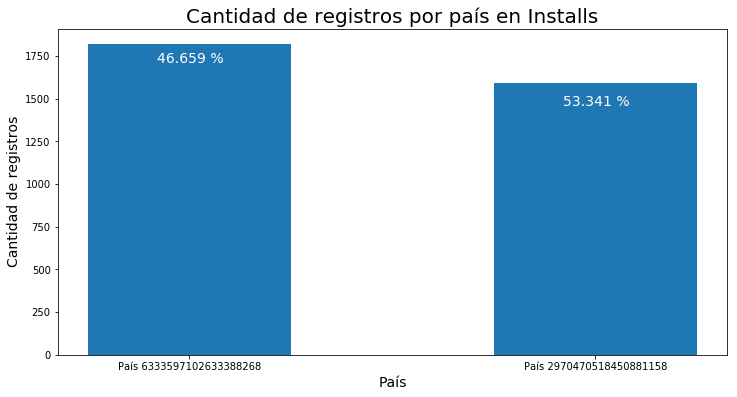

In [299]:
plt.figure(figsize=(12,6))
bar_names = ['País 6333597102633388268','País 2970470518450881158']
plt.bar(bar_names, paises_installs, width=0.5, log=False)
plt.ylabel('Cantidad de registros', fontsize=14)
plt.xlabel('País', fontsize=14)

font = {
    'color': 'white',
    'size': '14'
}
total = paises_installs[0] + paises_installs[1]
plt.figtext(0.24,0.8, "{0:.3f}".format(paises_installs[0]*100/total) + " %", fontdict=font)
plt.figtext(0.71,0.7, "{0:.3f}".format(paises_installs[1]*100/total) + " %", fontdict=font)
plt.title('Cantidad de registros por país en Installs', fontsize=20);
plt.savefig('res/countries_in_installs.png')

---

In [15]:
pd.DataFrame(dfAuctions['device_id'].unique())[0].isin(dfClicks['ref_hash']).value_counts()

False    189998
True      16979
Name: 0, dtype: int64

In [16]:
auction_clicks = dfAuctions['device_id'].isin(dfClicks['ref_hash']).value_counts().rename({0:'device_id de Auctions no está en Clicks', 1:'device_id de Auctions sí está en Clicks'})

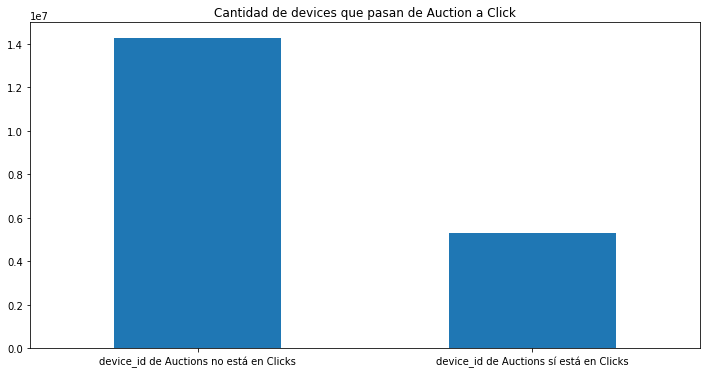

In [17]:
auction_clicks.plot(kind='bar', title='Cantidad de devices que pasan de Auction a Click', y='Cantidad de registros', 
                    figsize=(12,6), xticks=[]);

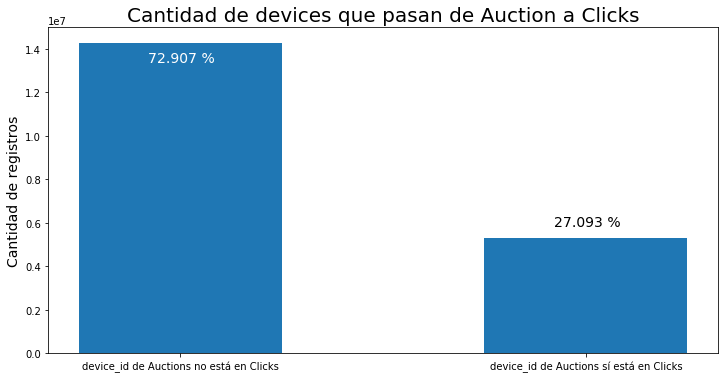

In [301]:
plt.figure(figsize=(12,6))
bar_names = ['device_id de Auctions no está en Clicks','device_id de Auctions sí está en Clicks']
plt.bar(bar_names, auction_clicks, width=0.5, log=False)
plt.ylabel('Cantidad de registros', fontsize=14)

font = {
    'color': 'white',
    'size': '14'
}
total = auction_clicks[0] + auction_clicks[1]
plt.figtext(0.24,0.8, "{0:.3f}".format(auction_clicks[0]*100/total) + " %", fontdict=font)
plt.figtext(0.71,0.42, "{0:.3f}".format(auction_clicks[1]*100/total) + " %", fontdict={'size': '14'})
plt.title('Cantidad de devices que pasan de Auction a Clicks', fontsize=20);
plt.savefig('res/devices_from_auction_to_clicks.png')

Se puede ver que hay mas del doble de registros cuyo device id en auctions coincide con el ref_hash en Clicks. Esto refleja el comportamiento esperado: por cada auction, lo mas probable es que el usuario ignore el ad, y no que que lo clickee. 

In [19]:
# idem pero considerando ids unicos
auction_clicks2 = pd.DataFrame(dfAuctions['device_id'].unique())[0].isin(dfClicks['ref_hash']).value_counts()

In [20]:
auction_clicks2

False    189998
True      16979
Name: 0, dtype: int64

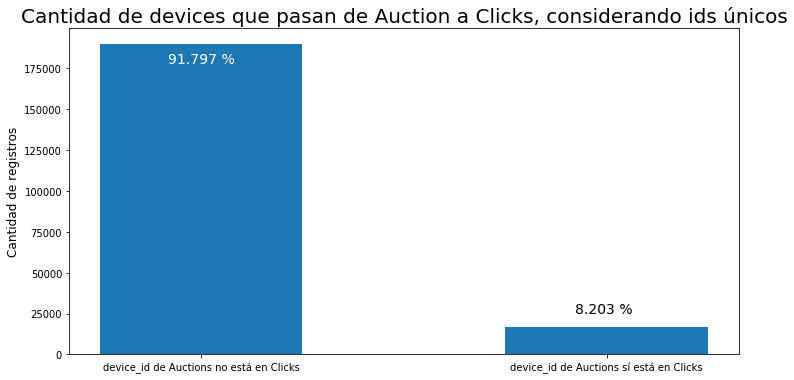

In [303]:
plt.figure(figsize=(12,6))
bar_names = ['device_id de Auctions no está en Clicks','device_id de Auctions sí está en Clicks']
plt.bar(bar_names, auction_clicks2, width=0.5, log=False)
plt.ylabel('Cantidad de registros', fontsize=12)

font = {
    'color': 'white',
    'size': '14'
}
total = auction_clicks2[0] + auction_clicks2[1]
plt.figtext(0.24,0.8, "{0:.3f}".format(auction_clicks2[0]*100/total) + " %", fontdict=font)
plt.figtext(0.71,0.22, "{0:.3f}".format(auction_clicks2[1]*100/total) + " %", fontdict={'size': '14'})
plt.title('Cantidad de devices que pasan de Auction a Clicks, considerando ids únicos', fontsize=20);
plt.savefig('res/unique_devices_from_auction_to_clicks.png')

In [22]:
print("ids unicos: "+ str(dfAuctions['device_id'].nunique()))
print("cant total de regs: "+ str(dfAuctions.shape[0]))
print(dfAuctions['device_id'].value_counts())

ids unicos: 206977
cant total de regs: 19571319
633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
8963711959081981780    14362
795159065504552200     12275
6841615430383729819    12077
5384039226444052914    11632
3198179064438296471    11565
519658456951133298     10541
2435544514359302887    10274
8751190726444323885    10256
1835469468095030098    10121
1800317677967270083    10036
9027154272484048876     9958
7574657722181550308     9767
5051610571898428259     9642
320899491737875154      9388
8292793494956750501     9315
201759600719985554      9158
8021195662481548645     9128
7650408579713341483     9020
6392567838173461255     8994
1478017482044456084     8839
6203407103275384250     8823
68016455690089173       8809
8496718680483076445     8682
8491787427844905567     8513
4834359787191717922     8495
                       ...  
5751956180575781757        1
2048572451559832028     

El efecto se acentúa aún más si tomamos `device_id`s únicos. Se podría pensar entonces 

## Auctions ∩ Events

In [23]:
list(set(auc_col).intersection(eve_col))

['date']

En primer lugar no pareceria haber una una union coherente. Sin embargo, como se comparte el campo de la fecha, hay que ver si no se puede encontrar alguna relacion util entre ambos datsets.

Por otro lado, considerar que device_id y ref_hash contienen el mismo tipo de informacion.

In [308]:
#     pd.DataFrame(dfAuctions['device_id'].unique())[0].isin(dfClicks['ref_hash']).value_counts()
auction_events = pd.DataFrame(dfAuctions['device_id'].unique())[0].isin(dfEvents['ref_hash']).value_counts()

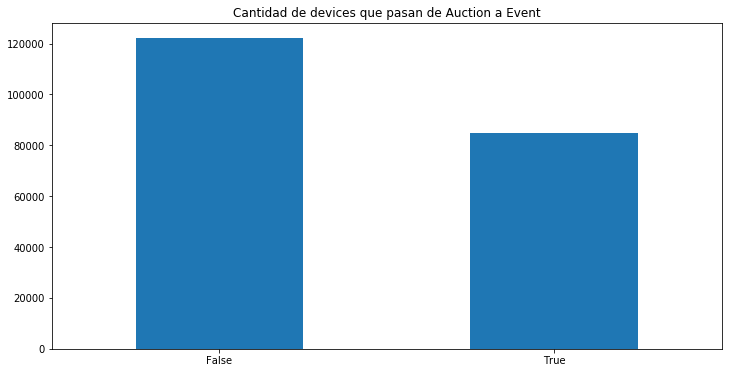

In [309]:
auction_events.plot(kind='bar', title='Cantidad de devices que pasan de Auction a Event', y='Cantidad de registros', 
                    figsize=(12,6), xticks=[]);

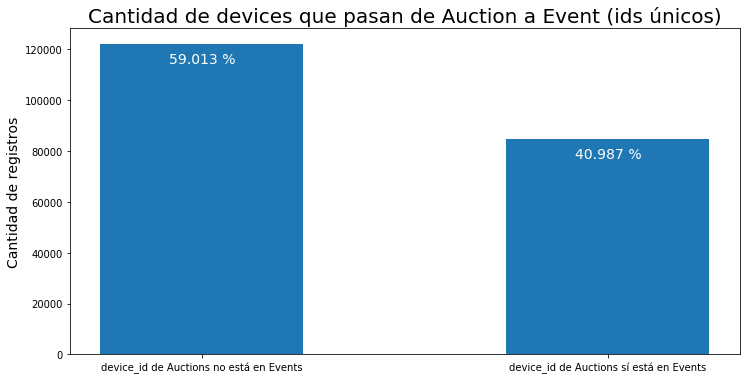

In [314]:
plt.figure(figsize=(12,6))
bar_names = ['device_id de Auctions no está en Events','device_id de Auctions sí está en Events']
plt.bar(bar_names, auction_events, width=0.5, log=False)
plt.ylabel('Cantidad de registros', fontsize=14)

font = {
    'color': 'white',
    'size': '14'
}
total = auction_events[0] + auction_events[1]
plt.figtext(0.24,0.8, "{0:.3f}".format(auction_events[0]*100/total) + " %", fontdict=font)
plt.figtext(0.71,0.58, "{0:.3f}".format(auction_events[1]*100/total) + " %", fontdict=font)
plt.title('Cantidad de devices que pasan de Auction a Event (ids únicos)', fontsize=20);
plt.savefig('res/devices_from_auction_to_events.png')

## Auctions ∩ Installs

In [27]:
list(set(auc_col).intersection(ins_col))

[]

No hay interseccion entre las columnas de *auctions* e *installs*.

Por otro lado, considerar que device_id y ref_hash contienen el mismo tipo de informacion.

In [318]:
auction_installs = pd.DataFrame(dfAuctions['device_id'].unique())[0].isin(dfInstalls['ref_hash']).value_counts().rename({0:'device_id de Auctions no está en Installs', 1:'device_id de Auctions sí está en Installs'})

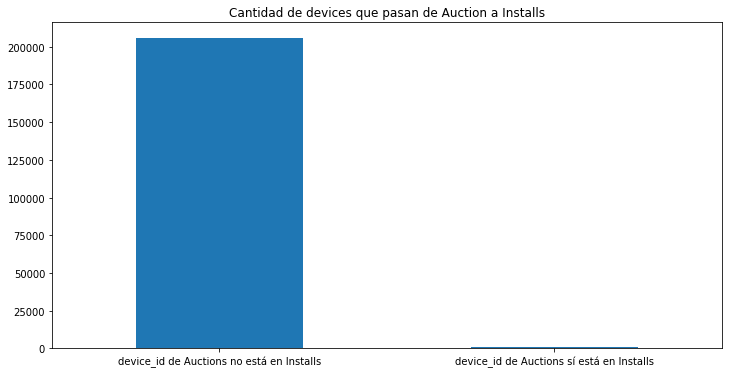

In [319]:
auction_installs.plot(kind='bar', title='Cantidad de devices que pasan de Auction a Installs', y='Cantidad de registros', 
                    figsize=(12,6), xticks=[]);

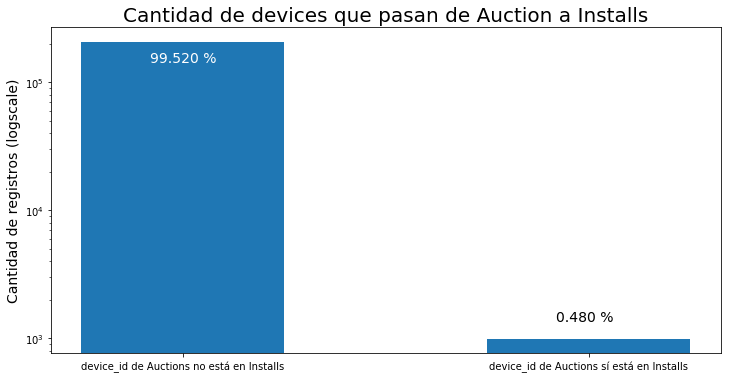

In [321]:
plt.figure(figsize=(12,6))
bar_names = ['device_id de Auctions no está en Installs','device_id de Auctions sí está en Installs']
plt.bar(bar_names, auction_installs, width=0.5, log=True)
plt.ylabel('Cantidad de registros (logscale)', fontsize=14)

font = {
    'color': 'white',
    'size': '14'
}
total = auction_installs[0] + auction_installs[1]
plt.figtext(0.24,0.8, "{0:.3f}".format(auction_installs[0]*100/total) + " %", fontdict=font)
plt.figtext(0.71,0.2, "{0:.3f}".format(auction_installs[1]*100/total) + " %", fontdict={'size': '14'})
plt.title('Cantidad de devices que pasan de Auction a Installs', fontsize=20);
plt.savefig('res/unique_devices_from_auction_to_installs.png')

## Clicks ∩ Events

In [31]:
list(set(cli_col).intersection(eve_col))

['trans_id', 'ref_hash', 'ref_type']

Lo unico que tiene sentido es juntar por ref_hash.

In [322]:
clicks_events = pd.DataFrame(dfClicks['ref_hash'].unique())[0].isin(dfEvents['ref_hash']).value_counts()

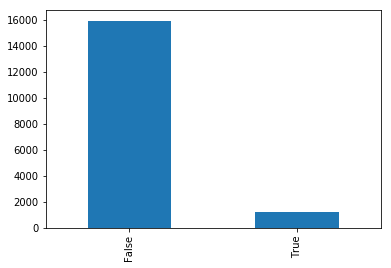

In [323]:
clicks_events.plot(kind='bar');

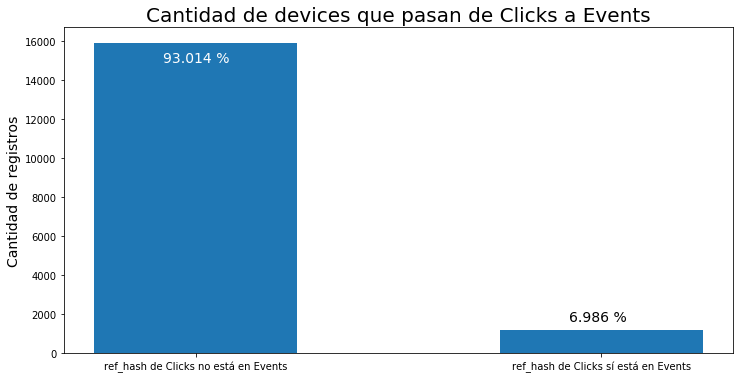

In [326]:
plt.figure(figsize=(12,6))
bar_names = ['ref_hash de Clicks no está en Events','ref_hash de Clicks sí está en Events']
plt.bar(bar_names, clicks_events, width=0.5, log=False)
plt.ylabel('Cantidad de registros', fontsize=14)

font = {
    'color': 'white',
    'size': '14'
}
total = clicks_events[0] + clicks_events[1]
plt.figtext(0.24,0.8, "{0:.3f}".format(clicks_events[0]*100/total) + " %", fontdict=font)
plt.figtext(0.71,0.2, "{0:.3f}".format(clicks_events[1]*100/total) + " %", fontdict={'size': '14'})
plt.title('Cantidad de devices que pasan de Clicks a Events', fontsize=20);
plt.savefig('res/unique_devices_from_clicks_to_events.png')

In [35]:
clicks_events

False    24571
True      1780
Name: ref_hash, dtype: int64

In [36]:
clicks_in_events_df = dfClicks.loc[dfClicks['ref_hash'].isin(dfEvents['ref_hash'])]

In [37]:
clicks_in_events_df['ref_hash'].isin(dfInstalls['ref_hash']).value_counts()

False    1772
True        8
Name: ref_hash, dtype: int64

De clicks a events, y de events a installs: pasan 8 regs.

***

In [38]:
dfClicks['trans_id'].isin(dfEvents['trans_id']).value_counts()

False    26351
Name: trans_id, dtype: int64

In [39]:
dfEvents['trans_id'].isin(dfClicks['trans_id']).value_counts()

False    2494423
Name: trans_id, dtype: int64

No hay interseccion entre trans_id de Events y Clicks.

O sea que hay devices que tienen registro en Events y en Clicks, sin embargo se trata de transacciones distintas.

## Clicks ∩ Installs

In [40]:
list(set(cli_col).intersection(ins_col))

['created', 'trans_id', 'ref_hash', 'ref_type']

In [41]:
dfInstalls = pd.read_csv('../data/installs.csv', engine='c',)

In [42]:
dfClicks['trans_id'].isin(dfInstalls['trans_id']).value_counts()

False    26351
Name: trans_id, dtype: int64

No hay intersecciones descriptas en ambos lados. Se cumple lo esperado.

In [43]:
dfClicks['ref_hash'].isin(dfInstalls['ref_hash']).value_counts()

False    26340
True        11
Name: ref_hash, dtype: int64

In [44]:
merged = dfClicks.merge(dfInstalls, on='ref_hash', how='inner', suffixes=('_clicks','_installs'))

In [45]:
merged.head()

,advertiser_id,action_id,source_id,created_clicks,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id_clicks,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type_clicks,ref_hash,created_installs,application_id,ref_type_installs,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id_installs,ip_address,device_language
0,3,NaN,0,2019-03-09T01:05:04.020Z,6333597102633388268,1.205689,1.070234,False,12.0,JuPIceEiBa-Z7nAmhCDmuszkzDqFdrA,6.391567095202501e+18,NaN,7.452405704979208e+18,31,NaN,NaN,NaN,NaN,-9,8187571300120427764,2019-03-06 10:27:43.604,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,2700825596283553676,3.301378e+18
1,3,NaN,0,2019-03-11T13:16:59.223Z,6333597102633388268,1.205689,1.070234,False,4.0,_Ulg5L_2n9uhQTTilN2rY4CMEic1juc,6.391567095202501e+18,NaN,7.452405704979208e+18,31,NaN,20.156250,0.966797,0.665039,-9,7759178785240189555,2019-03-08 14:10:39.335,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4175259317777181190,3.301378e+18
2,3,NaN,0,2019-03-12T02:14:06.129Z,6333597102633388268,1.205689,1.070234,False,4.0,dQJ6-J13KLFI71XtFa2XEi3DHMZooB4,6.391567095202501e+18,NaN,7.452405704979208e+18,31,NaN,15.648438,0.294922,2.345703,-9,7759178785240189555,2019-03-08 14:10:39.335,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4175259317777181190,3.301378e+18
3,3,NaN,0,2019-03-11T13:59:56.718Z,6333597102633388268,1.205689,1.070234,False,3.0,mQJ5Le4WZlIqCK_DPT0SwGY0Q-jfZWY,3.39996159531154e+18,3.516812e+18,6.693578508358796e+18,-110,NaN,NaN,NaN,NaN,91,1254317779988816837,2019-03-06 03:30:01.796,8,1494519392962156891,NaN,False,False,2970470518450881158,NaN,1.990627e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,3934343467960245099,3.301378e+18
4,3,NaN,1,2019-03-10T10:29:19.742Z,6333597102633388268,1.205689,1.070234,False,10.0,_wsKmSaUcdl3PqHeSEGXz4cSW9K0ltY,6.391567095202501e+18,6.882415e+18,7.452405704979208e+18,-110,NaN,0.094971,0.308105,0.878906,-9,2369915544093215150,2019-03-10 08:30:15.346,7,1891515180541284343,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,8945813689569211960,3.301378e+18


In [46]:
merged[['created_clicks','created_installs']]

,created_clicks,created_installs
0,2019-03-09T01:05:04.020Z,2019-03-06 10:27:43.604
1,2019-03-11T13:16:59.223Z,2019-03-08 14:10:39.335
2,2019-03-12T02:14:06.129Z,2019-03-08 14:10:39.335
3,2019-03-11T13:59:56.718Z,2019-03-06 03:30:01.796
4,2019-03-10T10:29:19.742Z,2019-03-10 08:30:15.346
5,2019-03-10T11:39:33.727Z,2019-03-08 00:30:02.714
6,2019-03-13T02:30:21.888Z,2019-03-11 09:38:31.388
7,2019-03-13T19:44:45.440Z,2019-03-06 21:33:40.647
8,2019-03-13T15:46:16.686Z,2019-03-06 21:33:40.647
9,2019-03-13T00:20:51.518Z,2019-03-06 21:33:40.647


In [47]:
merged['created_clicks'] = pd.to_datetime(merged['created_clicks'])
merged['created_installs'] = pd.to_datetime(merged['created_installs'])

In [48]:
print(merged['created_clicks'].max())

print(merged['created_clicks'].min())

2019-03-13 19:44:45.440000+00:00
2019-03-09 01:05:04.020000+00:00


In [49]:
print(merged['created_installs'].max())

print(merged['created_installs'].min())

2019-03-11 09:38:31.388000
2019-03-06 03:30:01.796000


In [50]:
merged[['timeToClick']]

,timeToClick
0,NaN
1,20.156250
2,15.648438
3,NaN
4,0.094971
5,5860.000000
6,108.812500
7,2.253906
8,3.492188
9,1.848633


In [327]:
clicks_installs = pd.DataFrame(dfClicks['ref_hash'].unique())[0].isin(dfInstalls['ref_hash']).value_counts()

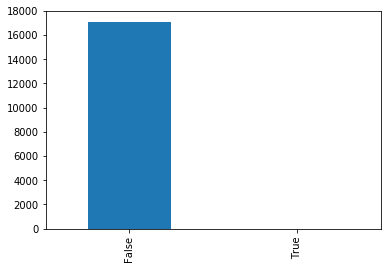

In [328]:
clicks_installs.plot(kind='bar')

In [329]:
clicks_installs

False    17112
True         7
Name: 0, dtype: int64

## Events ∩ Installs

In [54]:
list(set(eve_col).intersection(ins_col))

['wifi',
 'device_model',
 'device_brand',
 'attributed',
 'device_countrycode',
 'ref_type',
 'user_agent',
 'session_user_agent',
 'ip_address',
 'device_language',
 'ref_hash',
 'application_id',
 'event_uuid',
 'kind',
 'trans_id']

In [55]:
print(dfEvents['application_id'].isin(dfInstalls['application_id']).value_counts())

print(dfInstalls['application_id'].isin(dfEvents['application_id']).value_counts())

False    2265771
True      228652
Name: application_id, dtype: int64
True     3390
False      22
Name: application_id, dtype: int64


Es raro ver casos de app ids que esten en Installs pero no en events. Abajo comprobamos que no se trata de installs implicitos.

In [56]:
dfInstalls.loc[~dfInstalls['application_id'].isin(dfEvents['application_id'])]['application_id'].value_counts()

3     17
13     3
19     2
Name: application_id, dtype: int64

In [57]:
print(dfEvents['ref_hash'].isin(dfInstalls['ref_hash']).value_counts())

print(dfInstalls['ref_hash'].isin(dfEvents['ref_hash']).value_counts())

False    2451949
True       42474
Name: ref_hash, dtype: int64
True     3111
False     301
Name: ref_hash, dtype: int64


In [330]:
events_installs = pd.DataFrame(dfEvents['ref_hash'].unique())[0].isin(dfInstalls['ref_hash']).value_counts()

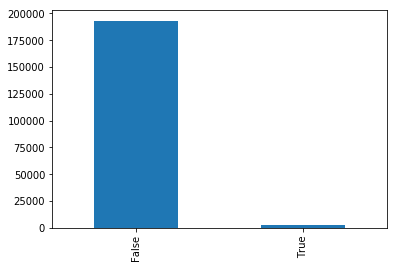

In [331]:
events_installs.plot(kind='bar')

In [332]:
events_installs

False    193341
True       2708
Name: 0, dtype: int64

In [335]:
events_installs_uuid = dfEvents['event_uuid'].isin(dfInstalls['event_uuid']).value_counts()

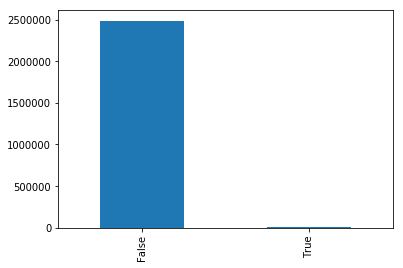

In [336]:
events_installs_uuid.plot(kind='bar')

In [63]:
pd.DataFrame(dfInstalls['event_uuid'].unique())[0].isin(dfEvents['event_uuid']).value_counts()

True     860
False      6
Name: 0, dtype: int64

In [64]:
dfInstalls['event_uuid'].isin(dfEvents['event_uuid']).value_counts()

True     3406
False       6
Name: event_uuid, dtype: int64

In [337]:
pd.DataFrame(dfEvents['event_uuid'].unique())[0].isin(dfInstalls['event_uuid']).value_counts()

False    2488465
True         860
Name: 0, dtype: int64

In [65]:
events_installs_uuid

False    2488465
True        5958
Name: event_uuid, dtype: int64

***

## Analisis inter-datasets

A continuacion se muestran las cantidades de registros que tienen informacion compartida entre los campos device_id y ref_hash (que representan la misma informacion) de los datasets Auctions y Clicks.

Se puede ver que hay mas del doble de registros cuyo device id en auctions coincide con el ref_hash en Clicks. Esto refleja el comportamiento esperado: por cada auction, lo mas probable es que el usuario ignore el ad, y no que que lo clickee. 

In [66]:
# TODO mejorar grafico
# - escalas
# - titulos ejes
# - titulo grafico

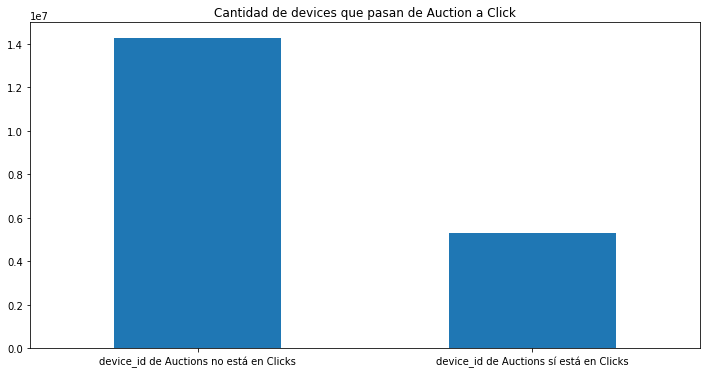

In [67]:
auction_clicks.plot(kind='bar', title='Cantidad de devices que pasan de Auction a Click', y='Cantidad de registros', 
                    figsize=(12,6), xticks=[])

Text(0, 0.5, 'adsf')

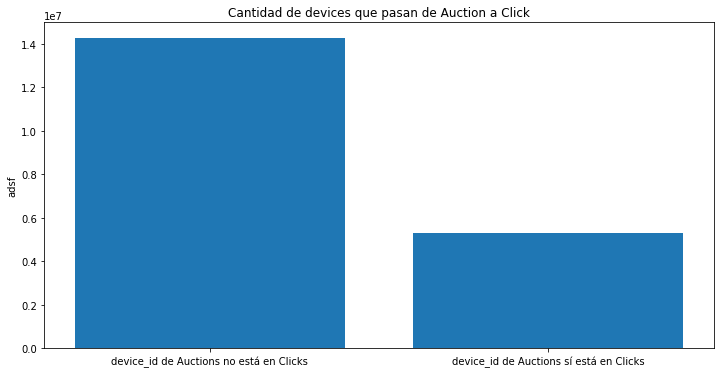

In [68]:
plt.figure(figsize=(12,6))
x_labels = ['device_id de Auctions no está en Clicks', 'device_id de Auctions sí está en Clicks']
plt.bar(x_labels, auction_clicks)
plt.title('Cantidad de devices que pasan de Auction a Click')
plt.ylabel('adsf')

***

# Auctions

# Date parsing

In [69]:
# let's see dates format
dfAuctions[['date']].head()

,date
0,2019-03-11 14:18:33.290763
1,2019-03-11 14:18:34.440157
2,2019-03-11 14:18:35.862360
3,2019-03-11 14:18:36.167163
4,2019-03-11 14:18:37.728590


In [70]:
dfAuctions['date'] = pd.to_datetime(dfAuctions['date'])

## Separation
Separate all date info in separate columns, and discard those of unique values.

In [71]:
dfAuctions['year'] = dfAuctions['date'].dt.year

dfAuctions['year'].nunique()

1

There's data from only one year. We can omit this column.

In [72]:
dfAuctions.drop('year', inplace=True, axis='columns')

In [73]:
dfAuctions['month'] = dfAuctions['date'].dt.month

dfAuctions['month'].nunique()

1

There's data from only one month. We can omit this column.

In [74]:
dfAuctions.drop('month', inplace=True, axis='columns')

In [75]:
dfAuctions['day_num'] = dfAuctions['date'].dt.day

dfAuctions['day_num'].nunique()

9

In [76]:
dfAuctions['weekday_name'] = dfAuctions['date'].dt.weekday_name

dfAuctions['weekday_name'].nunique()

7

In [77]:
dfAuctions['hour'] = dfAuctions['date'].dt.hour

dfAuctions['hour'].nunique()

24

In [78]:
dfAuctions['minute'] = dfAuctions['date'].dt.minute

dfAuctions['minute'].nunique()

60

## Time series

In [79]:
dfAuctions['count'] = dfAuctions.groupby(['weekday_name','hour', 'minute'])['device_id'].transform('count')

In [80]:
dfAuctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,day_num,weekday_name,hour,minute,count
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,11,Monday,14,18,1496
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,11,Monday,14,18,1496
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,11,Monday,14,18,1496
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,11,Monday,14,18,1496
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,11,Monday,14,18,1496


In [81]:
# Round date data to minute. It makes no sense to track data to the second or even ms.
# Resources:
#         https://stackoverflow.com/questions/43400331/remove-seconds-and-minutes-from-a-pandas-dataframe-column/43400370
#         http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.round.html
#         http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
dfAuctions['date'] = dfAuctions['date'].dt.round('min')

In [82]:
dfAuctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,day_num,weekday_name,hour,minute,count
0,NaN,6333597102633388268,2019-03-11 14:19:00,6059599345986491085,1,1,0,11,Monday,14,18,1496
1,NaN,6333597102633388268,2019-03-11 14:19:00,1115994996230693426,1,1,0,11,Monday,14,18,1496
2,NaN,6333597102633388268,2019-03-11 14:19:00,7463856250762200923,1,1,0,11,Monday,14,18,1496
3,NaN,6333597102633388268,2019-03-11 14:19:00,7829815350267792040,1,1,0,11,Monday,14,18,1496
4,NaN,6333597102633388268,2019-03-11 14:19:00,1448534231953777480,1,1,0,11,Monday,14,18,1496


Text(0, 0.5, 'Cantidad de eventos')

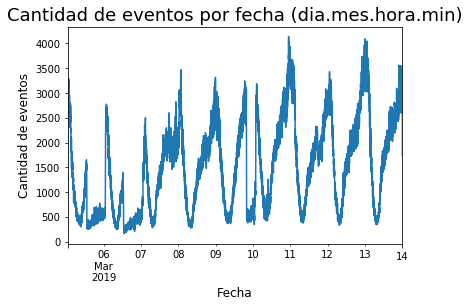

In [83]:
plot = dfAuctions["date"].value_counts().sort_index().plot()
plot.set_title("Cantidad de eventos por fecha (dia.mes.hora.min)", fontsize=18)
plot.set_xlabel("Fecha", fontsize = 12)
plot.set_ylabel("Cantidad de eventos", fontsize = 12)

In [84]:
data = dfAuctions['weekday_name'].value_counts()
data
list(data.keys())
data

Wednesday    3971343
Tuesday      3962311
Sunday       2637534
Monday       2574916
Friday       2303002
Saturday     2074552
Thursday     2047661
Name: weekday_name, dtype: int64

In [85]:
# fig, ax = plt.subplots()
# ax.barh(dfAuctions['weekday_name'].values, dfAuctions.groupby('weekday_name')['weekday_name'].count())

In [86]:
# plot = dfAuctions["weekday_name"].value_counts().sort_index().plot()
# plot.set_title("Cantidad de eventos por dia", fontsize=18)
# plot.set_xlabel("Dia", fontsize = 12)
# plot.set_ylabel("Cantidad de eventos", fontsize = 12)

In [87]:
dfAuctions['source_id'].nunique()

5

# Clicks

In [88]:
dfClicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int8
action_id          0 non-null float64
source_id          26351 non-null int8
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null category
trans_id           26351 non-null object
os_minor           26339 non-null category
agent_device       3243 non-null float64
os_major           26339 non-null category
specs_brand        26351 non-null int8
brand              6235 non-null category
timeToClick        22977 non-null float16
touchX             23011 non-null float16
touchY             23011 non-null float16
ref_type           26351 non-null int8
ref_hash           26351 non-null int64
dtypes: bool(1), category(4), float16(3), float64(4), int64(2), int8(4), o

In [89]:
print("num of nans in advertiser_id: " + str(dfClicks['advertiser_id'].isna().sum()))

print("num of unique values in advertiser_id: " + str(dfClicks['advertiser_id'].nunique()))

num of nans in advertiser_id: 0
num of unique values in advertiser_id: 7


#### agent_device

In [90]:
nans = dfClicks['agent_device'].isna().sum()
print("num of nans in agent_device: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in agent_device: " + str(dfClicks['agent_device'].nunique()))

num of nans in agent_device: 23108 (87.69306667678646 %).
num of unique values in agent_device: 190


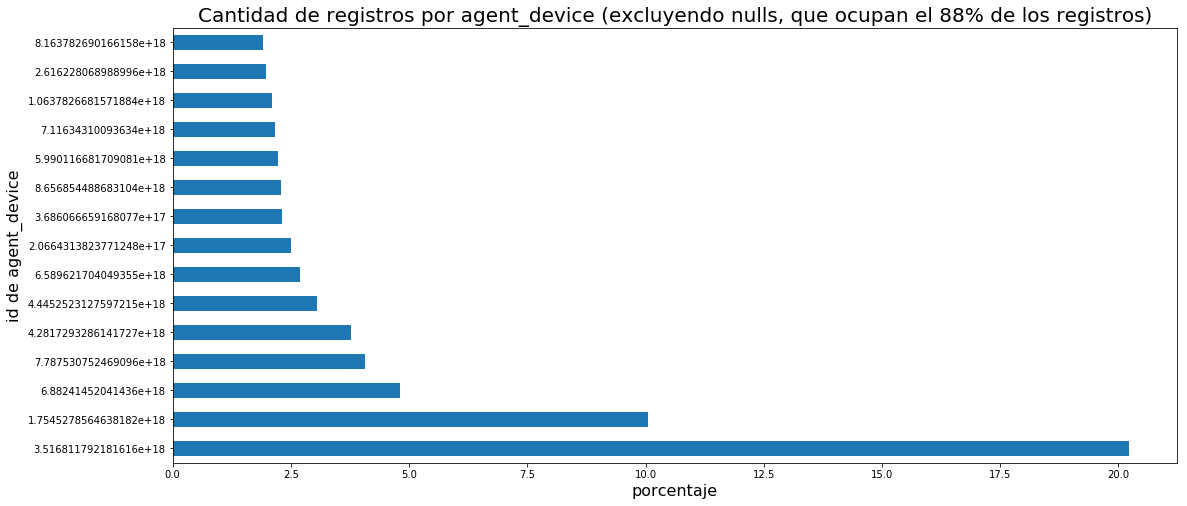

In [239]:
ax = dfClicks['agent_device'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por agent_device (excluyendo nulls, que ocupan el 88% de los registros)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('id de agent_device', fontsize=16);

#### brand

In [92]:
nans = dfClicks['brand'].isna().sum()
print("num of nans in brand: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in brand: " + str(dfClicks['brand'].nunique()))

num of nans in brand: 20116 (76.33865887442602 %).
num of unique values in brand: 13


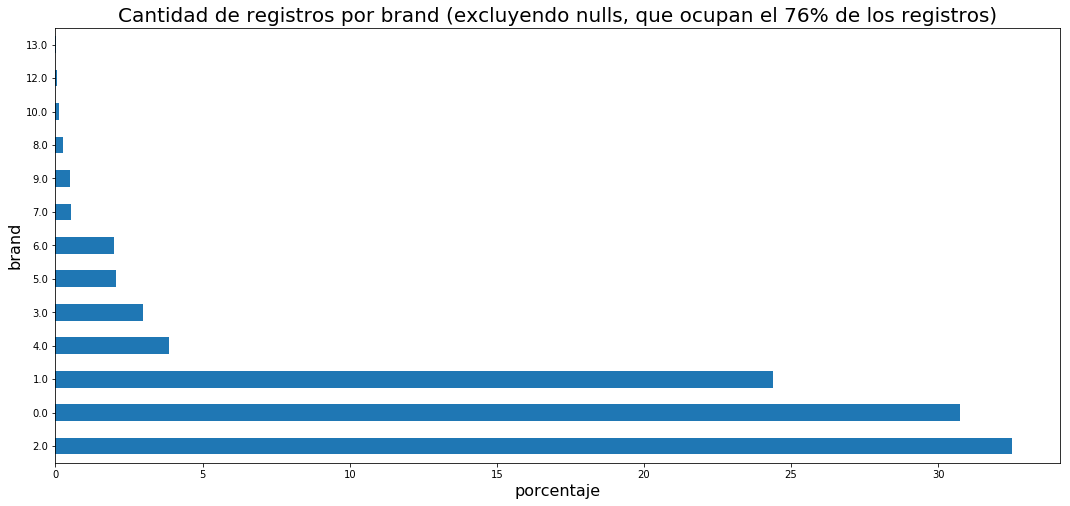

In [241]:
ax = dfClicks['brand'].value_counts(normalize=True).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por brand (excluyendo nulls, que ocupan el 76% de los registros)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('brand', fontsize=16);

#### carrier_id

In [94]:
nans = dfClicks['carrier_id'].isna().sum()
print("num of nans in carrier_id: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in carrier_id: " + str(dfClicks['carrier_id'].nunique()))

num of nans in carrier_id: 11 (0.04174414633220751 %).
num of unique values in carrier_id: 55


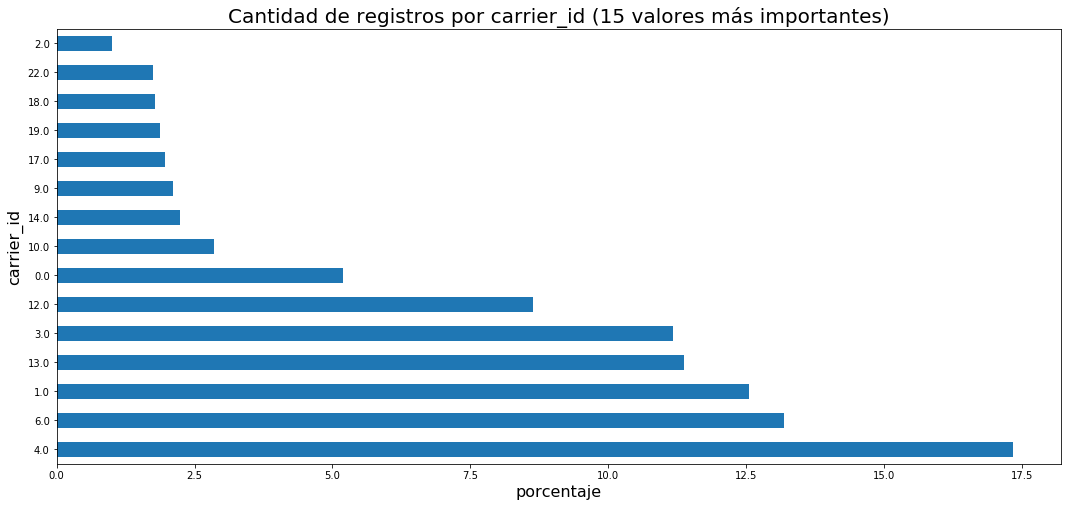

In [242]:
ax = dfClicks['carrier_id'].value_counts(normalize=True).apply(lambda x: x*100).nlargest(15).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por carrier_id (15 valores más importantes)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('carrier_id', fontsize=16);

#### latitude - longitude

In [96]:
nans = dfClicks['latitude'].isna().sum()
print("num of nans in latitude: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in latitude: " + str(dfClicks['latitude'].nunique()))

num of nans in latitude: 0 (0.0 %).
num of unique values in latitude: 78


In [97]:
nans = dfClicks['longitude'].isna().sum()
print("num of nans in longitude: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in longitude: " + str(dfClicks['longitude'].nunique()))

num of nans in longitude: 0 (0.0 %).
num of unique values in longitude: 81


In [161]:
from numpy import array,zeros

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    from: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

locations = list(set(zip(dfClicks['latitude'],dfClicks['longitude'])))


N = len(locations)
distance_matrix = zeros((N, N))

for i in range(N):
    for j in range(N):
        lati, loni = locations[i]
        latj, lonj = locations[j]
        distance_matrix[i, j] = haversine(loni, lati, lonj, latj)
        distance_matrix[j, i] = distance_matrix[i, j]

print(distance_matrix)

[[0.         1.52990056 3.3353115  ... 3.02207255 3.04488003 3.25660666]
 [1.52990056 0.         1.90254602 ... 1.50683323 1.54204705 1.78284094]
 [3.3353115  1.90254602 0.         ... 0.6204867  0.51377867 0.2352683 ]
 ...
 [3.02207255 1.50683323 0.6204867  ... 0.         0.11101688 0.3956699 ]
 [3.04488003 1.54204705 0.51377867 ... 0.11101688 0.         0.29622575]
 [3.25660666 1.78284094 0.2352683  ... 0.3956699  0.29622575 0.        ]]


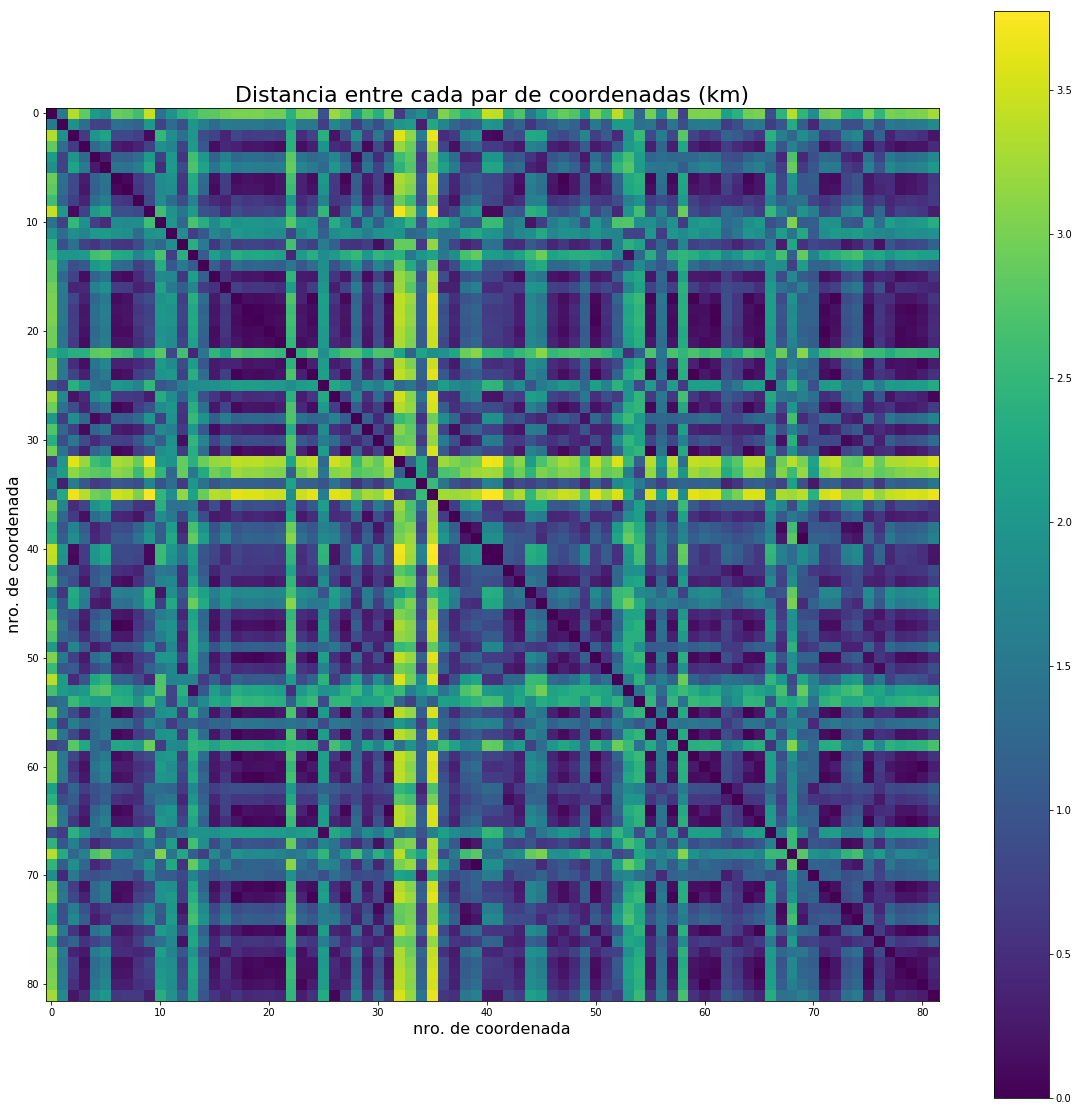

In [245]:
plt.figure(figsize=(20,20))
im = plt.imshow(distance_matrix)

plt.colorbar(im)

plt.title("Distancia entre cada par de coordenadas (km)", fontsize=22)
plt.xlabel('nro. de coordenada', fontsize=16)
plt.ylabel('nro. de coordenada', fontsize=16)
plt.savefig('res/clicks_distances_heatmap.png')
plt.show()

In [129]:
print(distances.max())
print(distances.min())

0.04806018000670287
0.0


In [133]:
dfClicks['latitude'].unique()

array([1.20568875, 1.21892373, 1.20963821, 1.20539313, 1.20505815,
       1.21505987, 1.20951971, 1.20586378, 1.2110902 , 1.20937215,
       1.2080589 , 1.20751602, 1.22346508, 1.21711146, 1.23540567,
       1.2117689 , 1.23414186, 1.20855117, 1.20659191, 1.20726773,
       1.21269266, 1.222768  , 1.23064104, 1.21403593, 1.22381894,
       1.23786087, 1.20848528, 1.21031269, 1.20932959, 1.21619271,
       1.21402807, 1.2177148 , 1.20616102, 1.20668377, 1.2077184 ,
       1.20643506, 1.20916504, 1.20845623, 1.20692337, 1.20555398,
       1.20790456, 1.20906364, 1.2090998 , 1.21221318, 1.20532471,
       1.20633405, 1.20833864, 1.20535575, 1.21391812, 1.20636936,
       1.20583273, 1.21367115, 1.20613559, 1.21082217, 1.20565488,
       1.20703578, 1.20879495, 1.22386309, 1.21105962, 1.20595979,
       1.20618079, 1.20624929, 1.20595061, 1.21260144, 1.20988308,
       1.20577132, 1.20655799, 1.2180479 , 1.22252735, 1.22355045,
       1.208644  , 1.206823  , 1.20625918, 1.22820768, 1.20574

In [134]:
dfClicks['longitude'].unique()

array([1.07023427, 1.07120906, 1.06420761, 1.07723836, 1.07733188,
       1.06615579, 1.06552544, 1.06997259, 1.06998684, 1.06714743,
       1.06962445, 1.07425542, 1.08177297, 1.05972762, 1.06373725,
       1.05831051, 1.07378071, 1.06898227, 1.06995834, 1.06769328,
       1.06343968, 1.07560536, 1.06008484, 1.0853578 , 1.05947524,
       1.06854944, 1.06079604, 1.07835582, 1.07255985, 1.06822603,
       1.07897267, 1.06479921, 1.07742195, 1.07144674, 1.07074315,
       1.07119421, 1.06232967, 1.06073884, 1.07044815, 1.07302095,
       1.07103944, 1.07194354, 1.06814421, 1.07558003, 1.06096543,
       1.07034034, 1.07263887, 1.08080919, 1.07009971, 1.05928841,
       1.06354956, 1.06993327, 1.07130504, 1.06930839, 1.0718406 ,
       1.06892879, 1.070163  , 1.0753671 , 1.06996746, 1.06987799,
       1.06296997, 1.06522466, 1.07322269, 1.07148331, 1.07189493,
       1.07559097, 1.06942796, 1.06176762, 1.06203733, 1.07121992,
       1.07101089, 1.05820388, 1.08265094, 1.06440793, 1.07144

#### os_major_version

In [175]:
nans = dfClicks['os_major'].isna().sum()
print("num of nans in os_major: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in os_major: " + str(dfClicks['os_major'].nunique()))

num of nans in os_major: 12 (0.04553906872604455 %).
num of unique values in os_major: 12


In [187]:
dfClicks['os_major'].nunique()

12

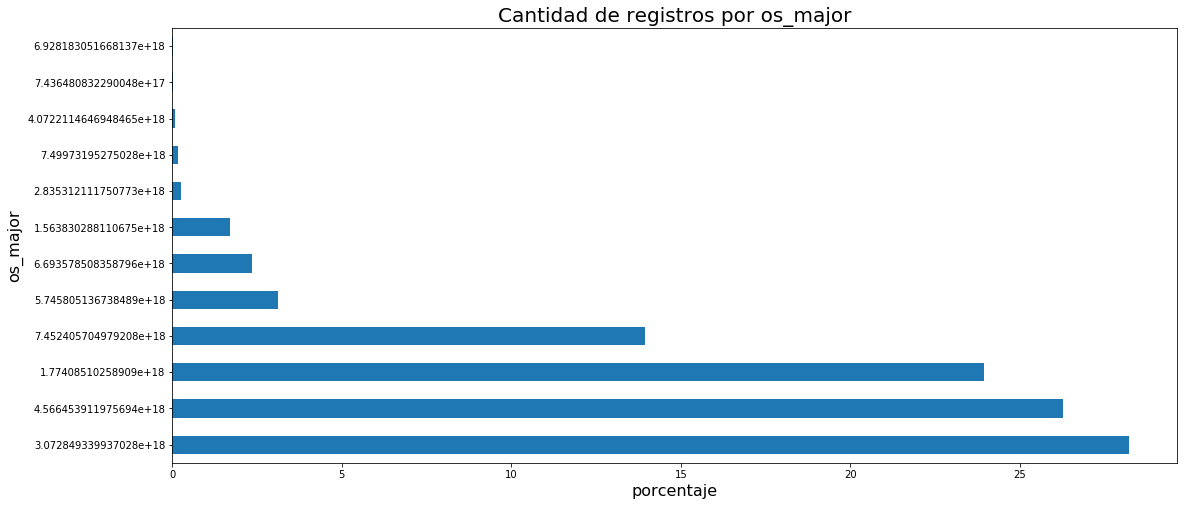

In [243]:
ax = dfClicks['os_major'].value_counts(normalize=True).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por os_major', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('os_major', fontsize=16);

#### os_minor

In [184]:
nans = dfClicks['os_minor'].isna().sum()
print("num of nans in os_minor: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in os_minor: " + str(dfClicks['os_minor'].nunique()))

num of nans in os_minor: 12 (0.04553906872604455 %).
num of unique values in os_minor: 28


In [223]:
sum = 0
percentages = dfClicks['os_minor'].value_counts(normalize=True).apply(lambda x: x*100).array
length = len(percentages)
for i in range(6):
    sum += percentages[i]
    
print(sum)

90.16667299441892


In [218]:
percentages

<PandasArray>
[   26.280420668969967,    14.226052621587758,    13.983066934963361,
    12.365693458369718,      11.7430426363947,    11.568396674133414,
     2.471620031132541,    2.2438209499221684,    2.1868711796195752,
    1.6895098523102625,   0.29993545692699036,   0.16705265955427312,
   0.13667944872622345,   0.13288279737271724,   0.12908614601921103,
   0.08352632977713656,   0.07593302707012414,    0.0493564675955807,
   0.03796651353506207,   0.03037321082804966,   0.03037321082804966,
  0.018983256767531036,  0.011389954060518622,  0.011389954060518622,
  0.007593302707012415,  0.007593302707012415,  0.007593302707012415,
 0.0037966513535062077]
Length: 28, dtype: float64

In [224]:
len(percentages)

28

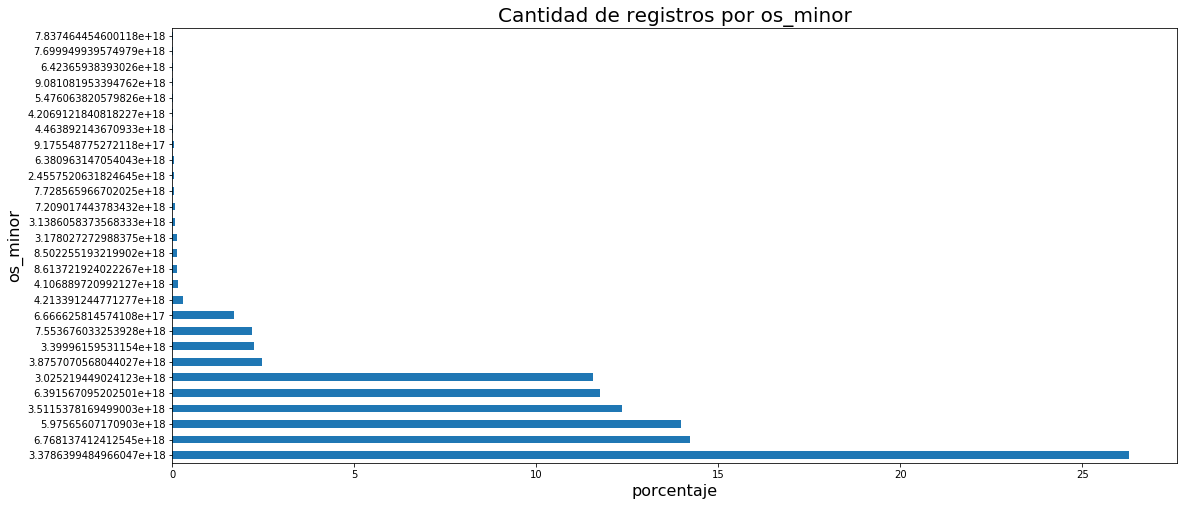

In [244]:
ax = dfClicks['os_minor'].value_counts(normalize=True).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por os_minor', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('os_minor', fontsize=16);

#### ref_type

In [227]:
nans = dfClicks['ref_type'].isna().sum()
print("num of nans in ref_type: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in ref_type: " + str(dfClicks['ref_type'].nunique()))

num of nans in ref_type: 0 (0.0 %).
num of unique values in ref_type: 3


Text(0, 0.5, 'ref_type')

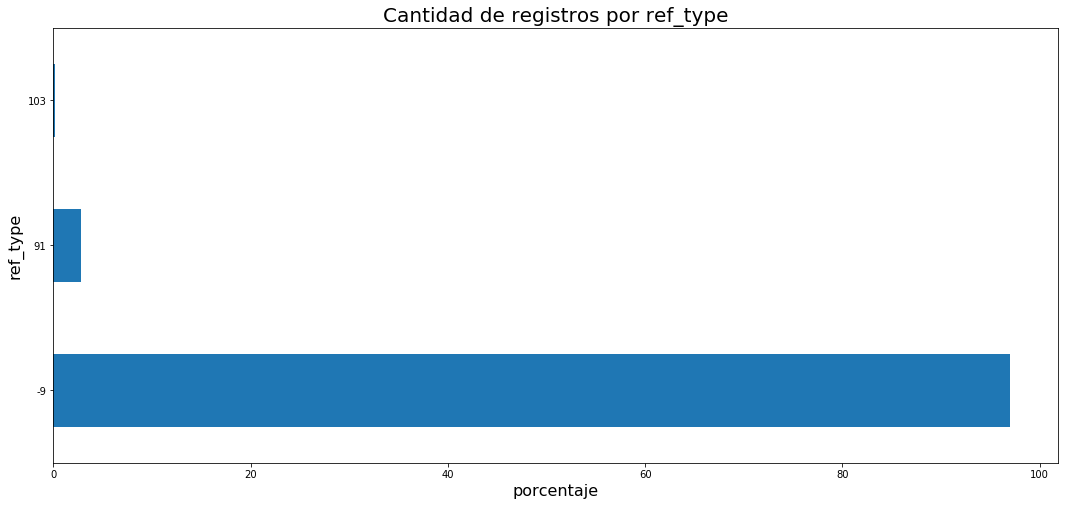

In [235]:
ax = dfClicks['ref_type'].value_counts(normalize=True).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por ref_type', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('ref_type', fontsize=16)

#### specs_brand

In [246]:
nans = dfClicks['specs_brand'].isna().sum()
print("num of nans in specs_brand: " + str(nans) + " (" + str(nans*100/dfClicks.shape[0]) + " %).")

print("num of unique values in specs_brand: " + str(dfClicks['specs_brand'].nunique()))

num of nans in specs_brand: 0 (0.0 %).
num of unique values in specs_brand: 5


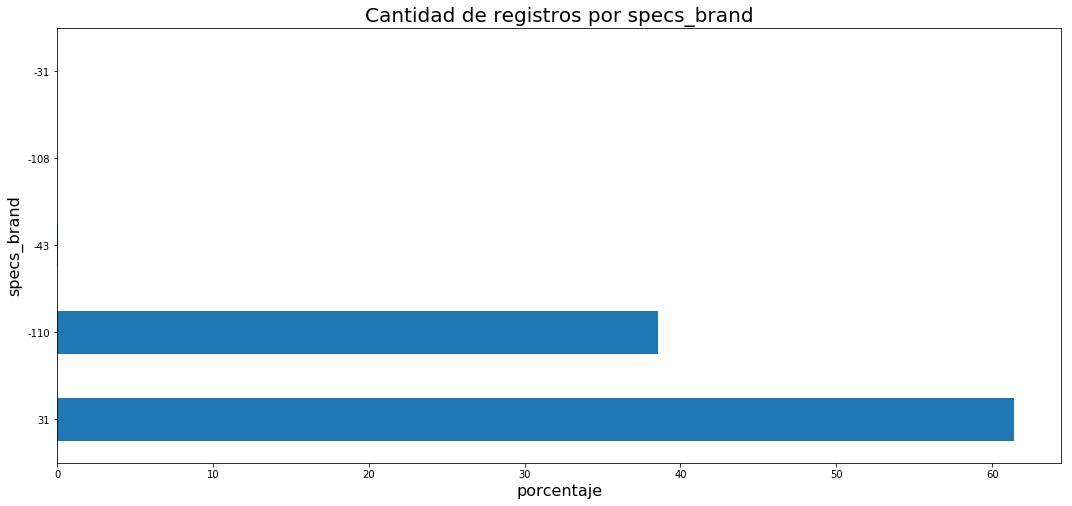

In [248]:
ax = dfClicks['specs_brand'].value_counts(normalize=True).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por specs_brand', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('specs_brand', fontsize=16);

# Events

In [249]:
dfEvents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int8
ref_type              int8
ref_hash              int64
application_id        int8
attributed            bool
device_countrycode    int64
device_os_version     category
device_brand          float64
device_model          category
device_city           category
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               category
kind                  category
device_os             category
wifi                  object
connection_type       category
ip_address            int64
device_language       category
dtypes: bool(1), category(8), float64(3), int64(3), int8(3), object(4)
memory usage: 228.5+ MB


#### application_id

In [251]:
nans = dfEvents['application_id'].isna().sum()
print("num of nans in application_id: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in application_id: " + str(dfEvents['application_id'].nunique()))

num of nans in application_id: 0 (0.0 %).
num of unique values in application_id: 232


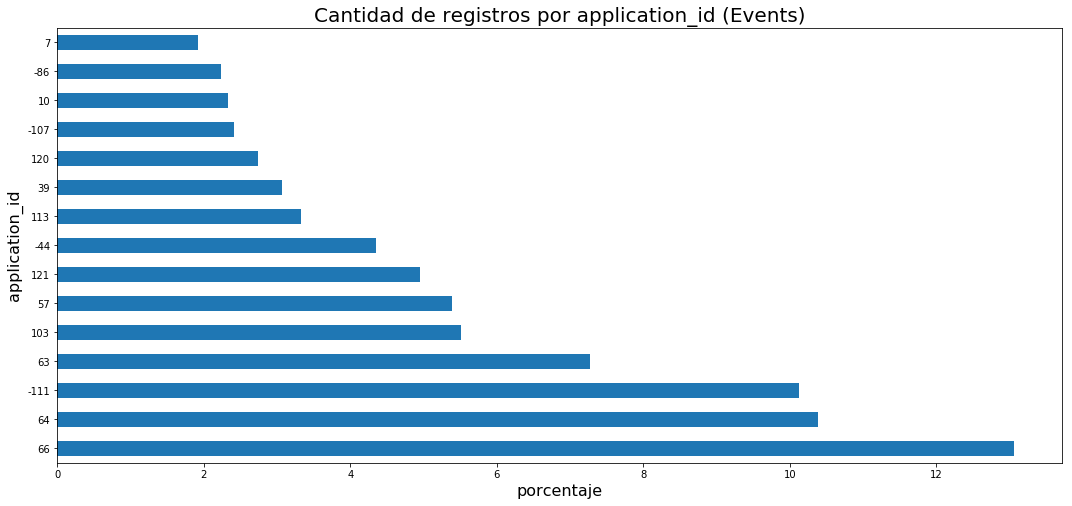

In [286]:
ax = dfEvents['application_id'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por application_id (Events)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('application_id', fontsize=16);

In [287]:
nans = dfInstalls['application_id'].isna().sum()
print("num of nans in application_id: " + str(nans) + " (" + str(nans*100/dfInstalls.shape[0]) + " %).")

print("num of unique values in application_id: " + str(dfInstalls['application_id'].nunique()))

num of nans in application_id: 0 (0.0 %).
num of unique values in application_id: 31


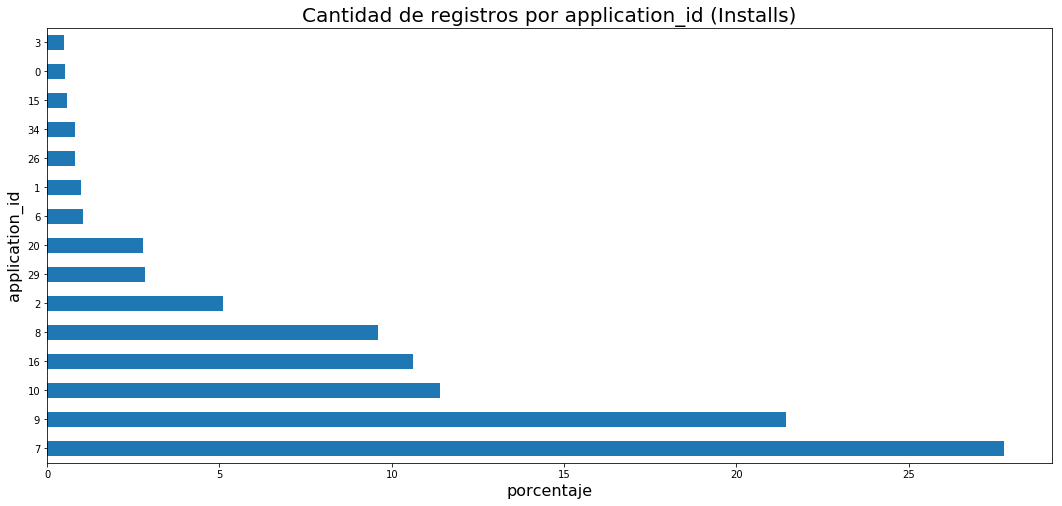

In [288]:
ax = dfInstalls['application_id'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('c', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('application_id', fontsize=16);

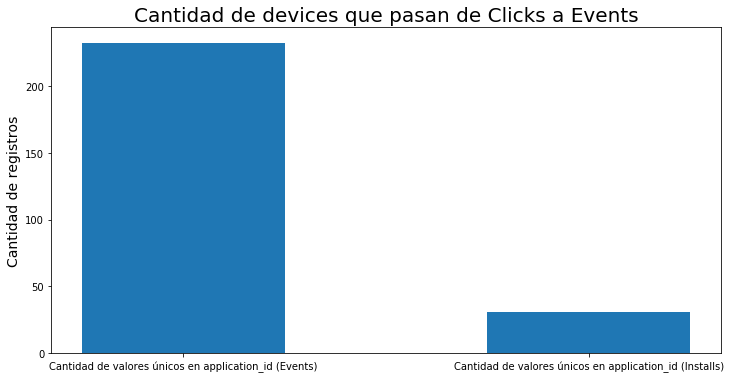

In [296]:
plt.figure(figsize=(12,6))
bar_names = ['Cantidad de valores únicos en application_id (Events)','Cantidad de valores únicos en application_id (Installs)']
values = [dfEvents['application_id'].nunique(),
         dfInstalls['application_id'].nunique()]
plt.bar(bar_names, values, width=0.5, log=False)
plt.ylabel('Cantidad de registros', fontsize=14)
total = clicks_events[0] + clicks_events[1]
plt.title('Cantidad de devices que pasan de Clicks a Events', fontsize=20);

#### carrier

In [256]:
nans = dfEvents['carrier'].isna().sum()
print("num of nans in carrier: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in carrier: " + str(dfEvents['carrier'].nunique()))

num of nans in carrier: 1877989 (75.28751138038737 %).
num of unique values in carrier: 84


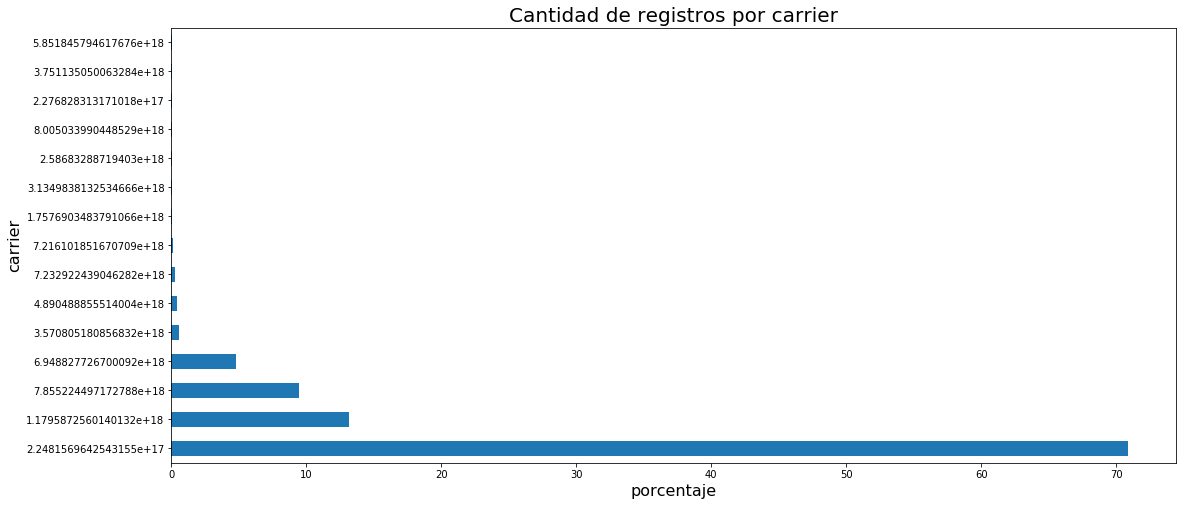

In [297]:
ax = dfEvents['carrier'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por carrier', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('carrier', fontsize=16);

#### device_brand

In [258]:
nans = dfEvents['device_brand'].isna().sum()
print("num of nans in device_brand: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in device_brand: " + str(dfEvents['device_brand'].nunique()))

num of nans in device_brand: 1329460 (53.29729560704018 %).
num of unique values in device_brand: 250


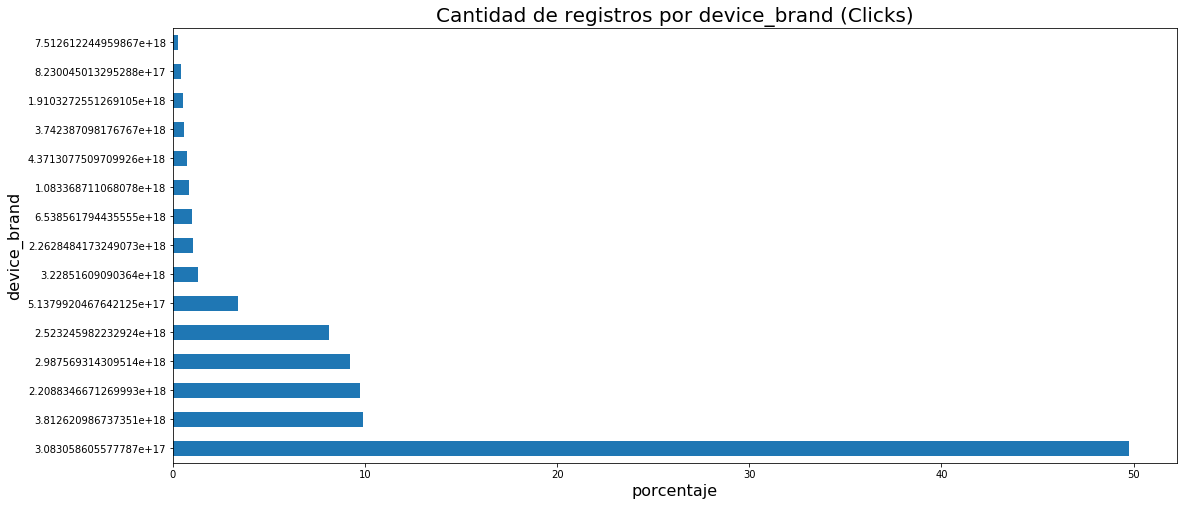

In [270]:
ax = dfEvents['device_brand'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por device_brand (Clicks)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('device_brand', fontsize=16);

In [268]:
nans = dfInstalls['device_brand'].isna().sum()
print("num of nans in device_brand: " + str(nans) + " (" + str(nans*100/dfInstalls.shape[0]) + " %).")

print("num of unique values in device_brand: " + str(dfInstalls['device_brand'].nunique()))

num of nans in device_brand: 2365 (69.31418522860493 %).
num of unique values in device_brand: 27


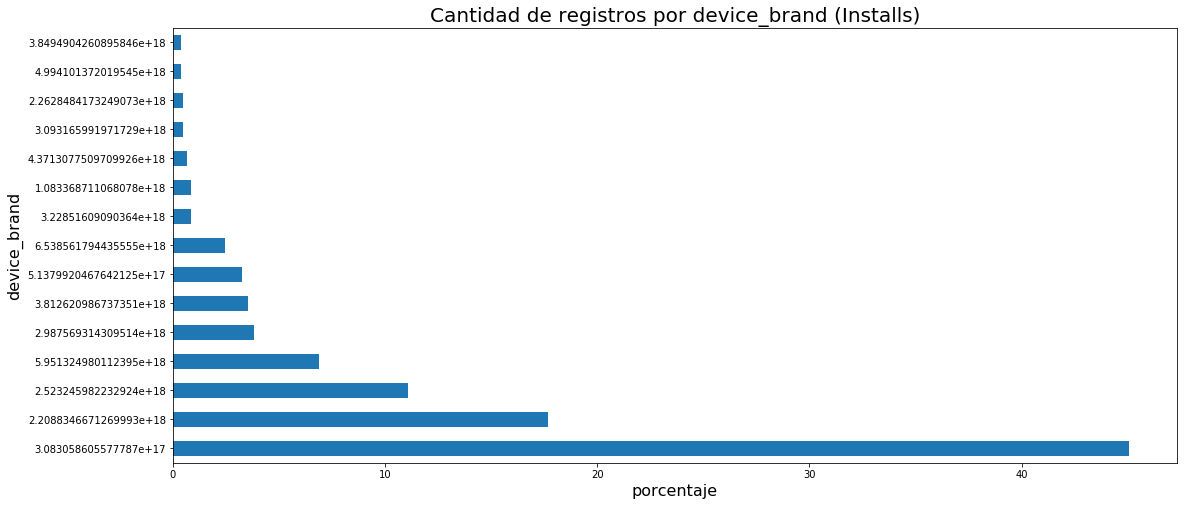

In [271]:
ax = dfInstalls['device_brand'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por device_brand (Installs)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('device_brand', fontsize=16);

#### device_city

In [260]:
nans = dfEvents['device_city'].isna().sum()
print("num of nans in device_city: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in device_city: " + str(dfEvents['device_city'].nunique()))

num of nans in device_city: 1879725 (75.35710663347797 %).
num of unique values in device_city: 127


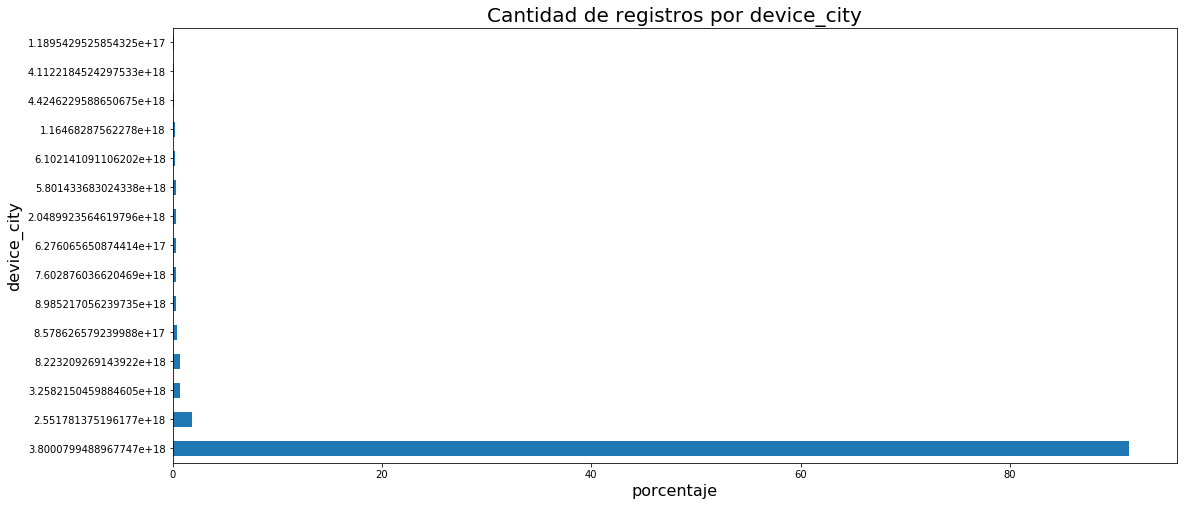

In [261]:
ax = dfEvents['device_city'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por device_city', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('device_city', fontsize=16);

#### device_os

In [266]:
nans = dfEvents['device_os'].isna().sum()
print("num of nans in device_os: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in device_os: " + str(dfEvents['device_os'].nunique()))

num of nans in device_os: 1836756 (73.63450385119124 %).
num of unique values in device_os: 4


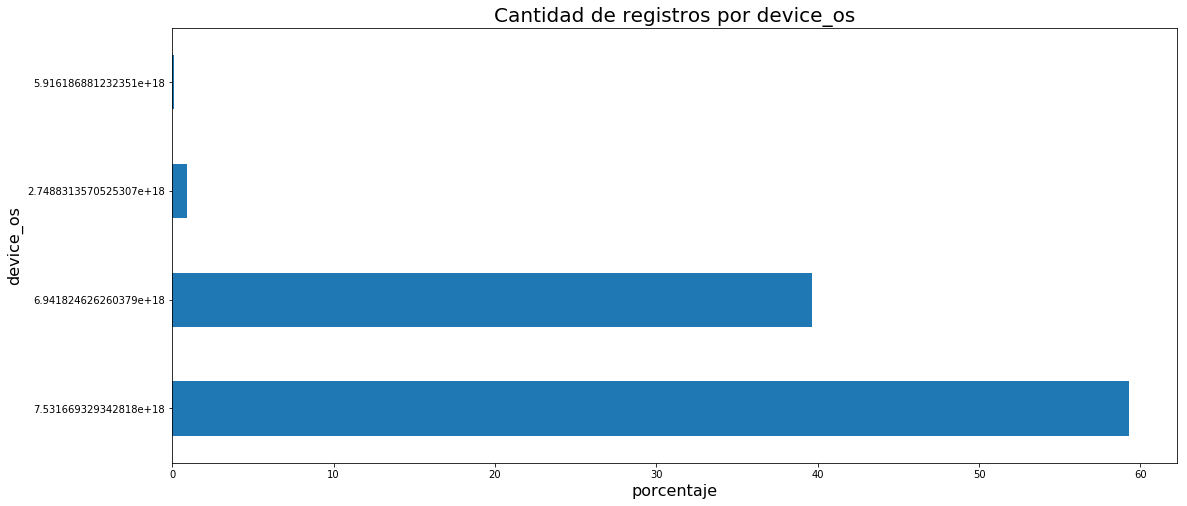

In [267]:
ax = dfEvents['device_os'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por device_os', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('device_os', fontsize=16);

#### device_os_version

In [272]:
nans = dfEvents['device_os_version'].isna().sum()
print("num of nans in device_os_version: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in device_os_version: " + str(dfEvents['device_os_version'].nunique()))

num of nans in device_os_version: 1472357 (59.025955100638505 %).
num of unique values in device_os_version: 81


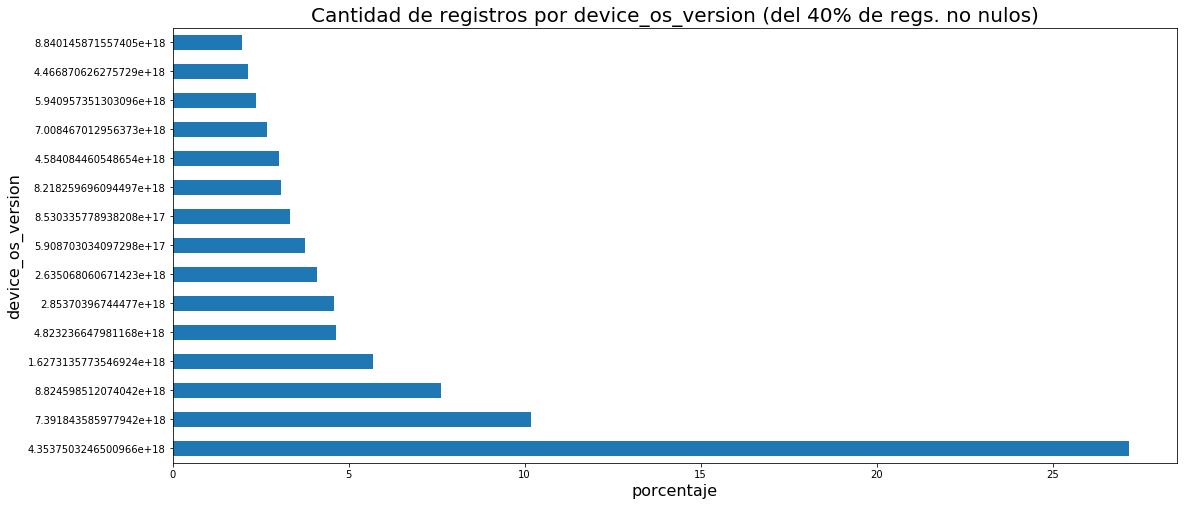

In [275]:
ax = dfEvents['device_os_version'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por device_os_version (del 40% de regs. no nulos)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('device_os_version', fontsize=16);

#### kind

In [276]:
nans = dfEvents['kind'].isna().sum()
print("num of nans in kind: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in kind: " + str(dfEvents['kind'].nunique()))

num of nans in kind: 5099 (0.20441601123786943 %).
num of unique values in kind: 583


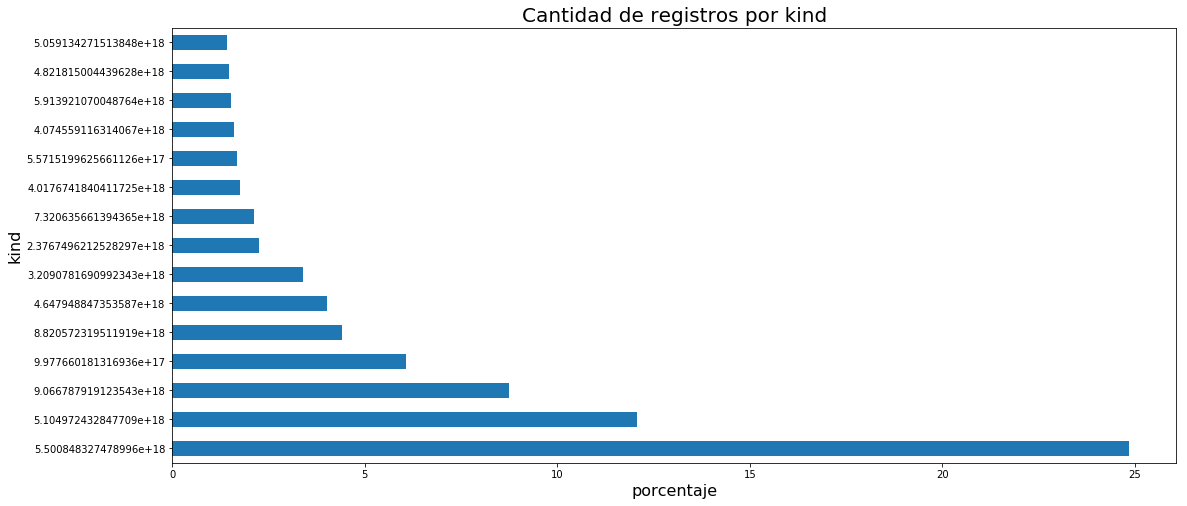

In [277]:
ax = dfEvents['kind'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por kind', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('kind', fontsize=16);

#### session_user_agent

In [278]:
nans = dfEvents['session_user_agent'].isna().sum()
print("num of nans in session_user_agent: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in session_user_agent: " + str(dfEvents['session_user_agent'].nunique()))

num of nans in session_user_agent: 11786 (0.4724940397037712 %).
num of unique values in session_user_agent: 1460


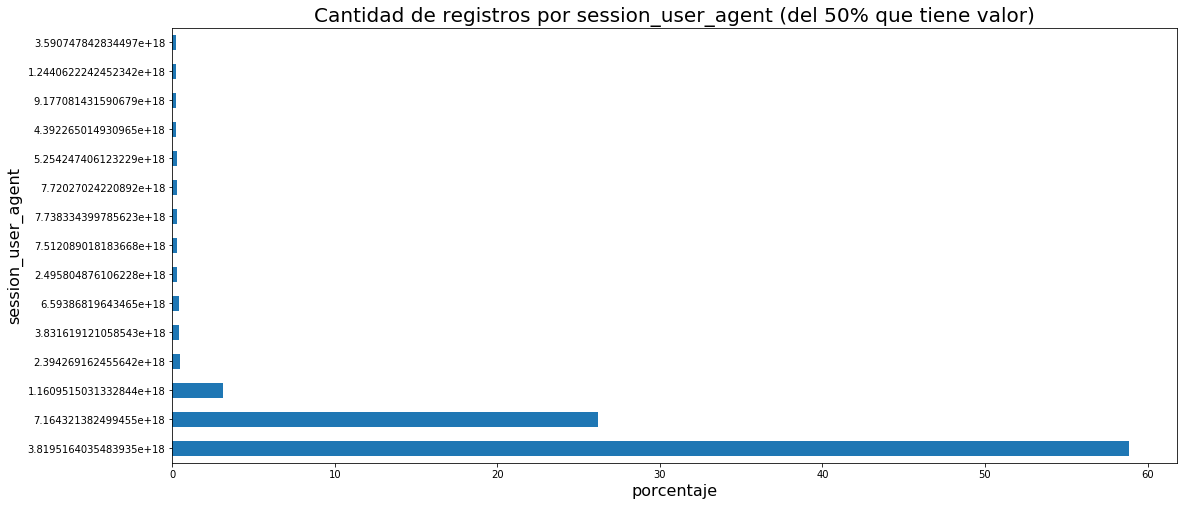

In [279]:
ax = dfEvents['session_user_agent'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por session_user_agent (del 50% que tiene valor)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('session_user_agent', fontsize=16);

#### user_agent

In [280]:
nans = dfEvents['user_agent'].isna().sum()
print("num of nans in user_agent: " + str(nans) + " (" + str(nans*100/dfEvents.shape[0]) + " %).")

print("num of unique values in user_agent: " + str(dfEvents['user_agent'].nunique()))

num of nans in user_agent: 1102896 (44.21447364781354 %).
num of unique values in user_agent: 5111


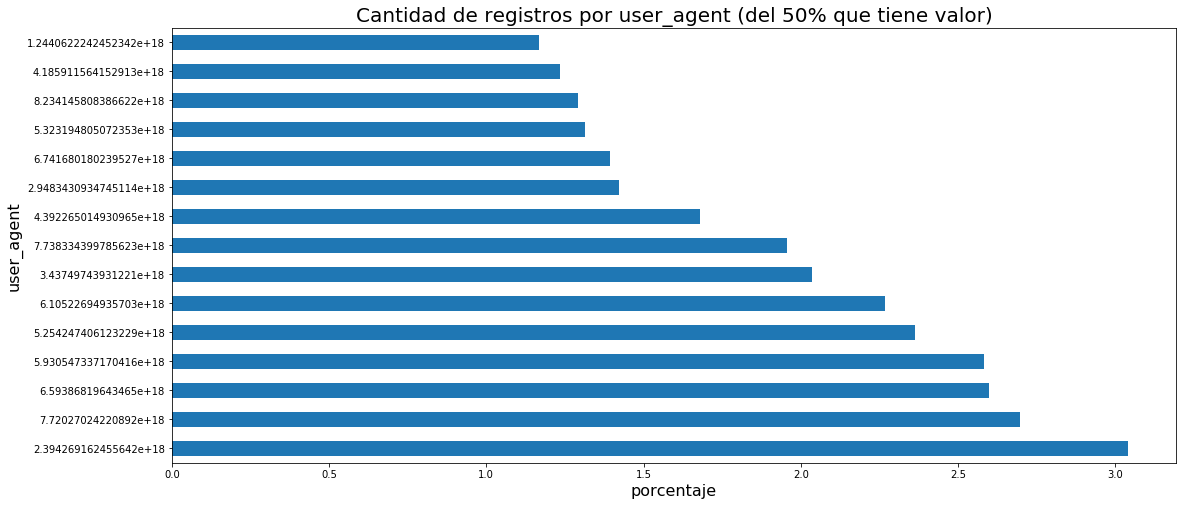

In [284]:
ax = dfEvents['user_agent'].value_counts(normalize=True).nlargest(15).apply(lambda x: x*100).plot(kind='barh', figsize=(18,8),)

ax.set_title('Cantidad de registros por user_agent (del 50% que tiene valor)', fontsize=20)
ax.set_xlabel('porcentaje', fontsize=16)
ax.set_ylabel('user_agent', fontsize=16);